<a href="https://colab.research.google.com/github/KamillaP/PMI/blob/main/LR1_%D0%9F%D0%BE%D1%82%D0%B5%D1%85%D0%B8%D0%BD%D0%B0%D0%9A%D0%98_6131.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import os

In [46]:
def load_data(folder):
    x_train = np.load(os.path.join(folder, 'x_train.npy'))
    y_train = np.load(os.path.join(folder, 'y_train.npy'))
    x_test = np.load(os.path.join(folder, 'x_test.npy'))
    y_test = np.load(os.path.join(folder, 'y_test.npy'))
    return x_train, y_train, x_test, y_test

In [47]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class LogisticRegression:
    def __init__(self, dim=2):
        rng = np.random.default_rng(seed=0)
        self.w = rng.normal(size=(dim, 1)) / np.sqrt(dim)
        self.b = np.zeros((1,))

    def predict(self, x, probs=False):
        # x - np.array размерности [N, dim]
        #     Массив входных признаков.
        assert x.shape[1] == self.w.shape[0], \
            "Размерность экземпляров данных не соответствует ожидаемой: " + \
            f"ожидалось x.shape[1]={self.w.shape[0]}, но было получено x.shape[1]={x.shape[1]}"

        x = x.dot(self.w) + self.b  # logits
        p = sigmoid(x)  # probabilities
        if probs:
            return p
        return np.array(p > 0.5).astype('int32')

    def fit(self, x, y, iters=1000, lr=0.01):
        # x - np.array размерности [N, dim]
        #     Массив входных признаков.
        # y - np.array размернсоти [N]
        #     Массив меток (правильных ответов).
        assert len(x) == len(y), \
            "Количество экземпляров в массиве X не равно количеству меток в массиве Y. " + \
            f"Полученные размеры: len(X) = {len(x)}, len(Y) = {len(y)}."
        assert x.shape[1] == self.w.shape[0], \
            "Размерность экземпляров данных не соответствует ожидаемой: " + \
            f"ожидалось x.shape[1]={self.w.shape[0]}, но было получено x.shape[1]={x.shape[1]}"
        # Алгоритм градиентного спуска.
        # Минимизируется бинарная кросс-энтропия.
        y = y.reshape(-1, 1)
        for i in range(iters):
            preds = self.predict(x, probs=True)
            self.w -= lr * np.mean(x.T.dot(preds - y), axis=1, keepdims=True)
            self.b -= lr * np.mean(preds - y, axis=0)
        return self

## 1. Применение логистической регрессии (несбалансированные данные)

### 1.1 Создание и обучение логистической регрессии

In [48]:
# Указание: производить нормализацию данных не нужно, это часть задания.
x_train, y_train, x_test, y_test = load_data('dataset1')

In [49]:
# Создайте модель логистической регрессии и обучите её, используя метод fit.
from sklearn.ensemble import RandomForestClassifier
# Создание модели
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Импортируем необходимые библиотеки
from sklearn.metrics import accuracy_score

# Предсказания на тестовой выборке
y_pred = rf_classifier.predict(x_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.93


### 1.2 Анализ качества модели

In [51]:
# Допишите класс "глупого классификатора", что всегда предсказывает класс `0`.

class DummyClassifier:
    def __init__(self):
        print('Hello, Александр Викторович, Рустам Александрович, Игорь Александрович!')

    def predict(self, x):
        # x - numpy массив размерности [N, dim]
        # Должен возвращаться массив N предсказаний

        # Получаем число строк в массиве x (это будет N)
        N = x.shape[0]

        # Создаём массив длины N, заполненный нулями,
        # так как наш "глупый классификатор" всегда предсказывает класс 0
        predictions = np.zeros((N,), dtype=int)
        return predictions

In [52]:
# Оцените точность "глупого классификатора", объясните результат.
model2 = DummyClassifier()
y_pred_dum = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_dum)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Можно сравнить оценку точности "глупого классификатора" с определением доли класса '0' в y_test

Hello, Александр Викторович, Рустам Александрович, Игорь Александрович!
Accuracy: 90.91%


In [53]:
# Используйте дополнительные метрики (f1-score, recall, precision) из пакета sklearn для анализа "глупого классификатора".
from sklearn.metrics import f1_score, recall_score, precision_score

# Вычисление значений метрик
precision = precision_score(y_test, y_pred_dum, zero_division=1)
recall = recall_score(y_test, y_pred_dum)
f1 = f1_score(y_test, y_pred_dum)

# Вывод результатов
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 1.0
Recall: 0.0
F1 Score: 0.0


In [54]:
# Используя те же метрики, проанализируйте обученную вами модель логистической регрессии.
# Вычисление значений метрик
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8571428571428571
Recall: 0.3
F1 Score: 0.4444444444444444


In [38]:
# Объясните результат, описав его комментариями в этой клетке.

print(y_pred)
print("xxxxxxxxxxxxxxxx")
print(y_test)


#Метрика precision показывает, что с 85% точностью модель предсказала результатом 1
#Метрика recall показывает что только 30% результата 1 были предсказанны верно



[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
xxxxxxxxxxxxxxxx
[1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1.]


### 1.3 Анализ набора данных

In [39]:
# Посчитайте количество экземпляров данных для каждого класса.
from collections import Counter
class_counter = Counter(y_train)
print(class_counter)

Counter({1.0: 155, 0.0: 145})


In [40]:
# Предложите способ улучшения качества модели. Подсказка: добавление дубликатов в данные.
# Указание: не изменяйте тестовую выборку.

# Создаем дубликаты для редко встречающихся классов
# Найдем наименее представленный класс
counter = Counter(y_train)
min_class = min(counter, key=counter.get)
# Создаем дубликаты для наименее представленного класса
x_minority = x_train[y_train == min_class]
y_minority = y_train[y_train == min_class]

# Объединяем оригинальные данные с новыми дубликатами
x_train_update = np.concatenate([x_train, x_minority])
y_train_update = np.concatenate([y_train, y_minority])

while(min(counter, key=counter.get) == min_class):
    x_train_update = np.concatenate([x_train_update, x_minority])
    y_train_update = np.concatenate([y_train_update, y_minority])
    counter = Counter(y_train_update)

In [41]:
# Создайте и обучите модель с использованием предложенных наработок.
# Создаем модель логистической регрессии
model4 = LogisticRegression()

# Обучаем модель на обновленных данных
model4.fit(x_train_update, y_train_update)

In [42]:
# Оцените качество новой модели, используя метрики из пакета sklearn.metrics.
# Указание: постарайтесь сбалансировать данные таким образом, чтобы новая модель была ощутимо лучше старой.
y_update_pred = model4.predict(x_test)
# Вычисление значений метрик
precision = precision_score(y_test, y_update_pred, zero_division=1)
recall = recall_score(y_test, y_update_pred)
f1 = f1_score(y_test, y_update_pred)

# Вывод результатов
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 1.0
Recall: 0.4888888888888889
F1 Score: 0.6567164179104478


## 2. Применение логистической регрессии (нелинейные данные)

In [26]:
x_train, y_train, x_test, y_test = load_data('dataset2')

In [27]:
# Создайте и обучите модель но этом наборе данных.

# Создаём модель логистической регрессии
model = LogisticRegression()

# Обучаем модель
model.fit(x_train, y_train)


In [28]:
# Проанализируйте качество модели.

# Предсказание на тестовом наборе данных
y_pred = model.predict(x_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Вычисление значений метрик
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 57.00%
Precision: 0.5147058823529411
Recall: 0.7777777777777778
F1 Score: 0.6194690265486725


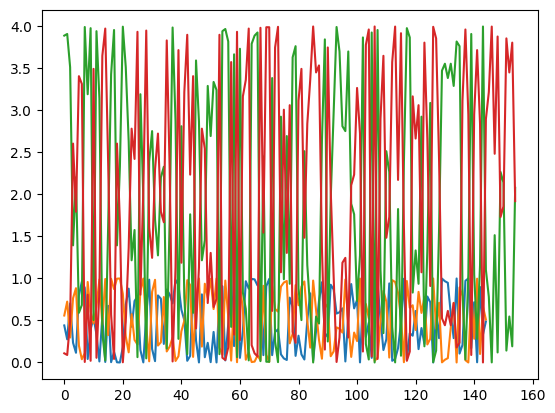

In [29]:
# FEATURE ENGINEERING: попробуйте применить на исходных данных разные нелинейные функции (sin, tanh, ...).
# Объедините трансформированные данные с исходными (важно: количество экземпляров в x_train не должно увеличиться).
import matplotlib.pyplot as plt

x_train_feat = x_train.copy()
x_train_feat = np.power(abs(x_train_feat), 2)

plt.plot(x_train_feat[y_train==0])
plt.plot(x_train_feat[y_train==1])

In [30]:
# Создайте и обучите модель с использованием наработок.
model3 = LogisticRegression()
model3.fit(x_train_feat, y_train)


In [31]:
# Оцените качество новой модели, используя метрики из пакета sklearn.metrics.
# Указание: постарайтесь добиться точности в 100%!

# Предсказание на тестовом наборе данных
y_pred = model3.predict(x_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Вычисление значений метрик
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 78.00%
Precision: 1.0
Recall: 0.5111111111111111
F1 Score: 0.6764705882352942


## 3. Доп. задания (любое на выбор, опционально)

### 3.1 'Упрощение' логистической регрессии

Сложность: легко.

In [ ]:
"""
Модифицируйте класс логистической регрессии так, чтобы в нём не использовалась сигмоида.
То есть вывод о предсказанном классе должен делаться на основе значений "до сигмоиды".
Вспомогательная ссылка: https://en.wikipedia.org/wiki/Logit
"""

class LogisticRegression:
    def __init__(self, dim=2):
        self.w = np.random.randn(dim, 1) / np.sqrt(dim)
        self.b = np.zeros((1,))

    def predict(self, x, probs=False):
        x = x.dot(self.w) + self.b
        p = sigmoid(x)
        if probs:
            return p
        return np.array(p > 0.5).astype('int32')

    def fit(self, x, y, iters=1000, lr=0.01):
        y = y.reshape(-1, 1)
        for i in range(iters):
            preds = self.predict(x, probs=True)
            self.w -= lr * np.mean(x.T.dot(preds - y), axis=1, keepdims=True)
            self.b -= lr * np.mean(preds - y, axis=0)

In [ ]:
# Перенесите обученные веса модели из пункта 1.3 в новую модель с модифицированным кодом


In [ ]:
# Убедитесь, что предсказания модели с модифицированными кодом совпадают с предсказаниями
# модели из пункта 1.3

### 3.2 'Обобщение' логистической регрессии

Напишите многоклассовый классификатор. Обучите его на наборе данных ниже.

In [ ]:
x_train, y_train, x_test, y_test = load_data('dataset3')

<b>Ансамбль логистических регрессий.</b> Сложность: супергерой.

In [ ]:
"""
Напишите класс, что инкапсулирует в себе `C` логистических регрессий,
где `C` - количество классов. i-ая логистическая регрессия производит
бинарную классификацию вида: все остальные классы и i-ый класс.
"""

class MulticlassLogisticRegression:
    def __init__(self, n_classes, dim):
        pass

    def predict(self, x):
        # x - numpy массив размерности [N, dim]
        # Возвращается массив целых чисел размерности [N],
        # где i-ый элемент обозначает номер класса для
        # i-го экземпляра данных в `x`.
        pass

    def fit(self, x, y):
        pass

In [ ]:
# Создайте и обучите написанный классификатор. Оцените точность модели.


<b>Softmax классификатор.</b> Сложность: математический гений.

In [ ]:
"""
Напишите класс классификатора, основанного на функции Softmax.
Алгоритм работы данного классификатора:
x - вектор (экземпляр данных) размерности dim.
W - матрица весов размерности [dim, n_classes].

Ответ классификатора формируется как:
logits = x * W - матричное умножение
p = softmax(logits)
class_id = argmax(p)

Для данного классификатора требуется модифицировать алгоритм обучения в методе fit.

Вспомогательные ресурсы:
https://en.wikipedia.org/wiki/Softmax_function
https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/
"""

class SoftmaxClassificator:
    def __init__(self, n_classes, dim):
        pass

    def predict(self, x):
        # x - numpy массив размерности [N, dim]
        # Возвращается массив целых чисел размерности [N],
        # где i-ый элемент обозначает номер класса для
        # i-го экземпляра данных в `x`.
        pass

    def fit(self, x, y):
        pass

In [ ]:
# Создайте и обучите написанный классификатор. Оцените точность модели, посчитайте матрицу ошибок (выведите её с помощью matplotlib).


In [ ]:
# Создайте и обучите написанный классификатор на наборе данных из задания 1 (опционально).
# Оцените точность модели, посчитайте матрицу ошибок (выведите её с помощью matplotlib).
